
<center><h1>Midterm</h1></center>

-an intensive analysis of consumer behavioral, applying techniques ranging from supervised, unsupervised learning, as well as semi-supervised learning.


# Data

The data is in `dat/online_shoppers_intention.csv.gz`, from [Online Shoppers Purchasing Intention Dataset](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset)

- The dataset consists of 10 numerical and 8 categorical variables.
- Variable `Revenue` is the target label. This binary variable is imbalanced, specifically 84.5% of user journeys did NOT result in a purchase; in other words `Revenue` is False.
- `Administrative`, `Administrative Duration`, `Informational`, `Informational Duration`, `Product Related`, and `Product Related Duration` represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. 
- The values of these features are derived from the URL information of the pages visited by the user and updated when a user takes an action, e.g, moving from one page to another. 
- Features `Bounce Rate`, `Exit Rate` and `Page Value` represent  metrics measured by Google Analytics for each page in the e-commerce site. 
- The value of `Bounce Rate` for a web page refers to the percentage of visitors who enter the site from that page and then leave (i.e., bounce) without triggering any other requests to the analytics server during that session. 
- The value of `Exit Rate` for a specific web page is calculated as for all page views to the page and it represents the percentage that the page was seen in the last session. 
- Feature `Page Value` represents the average value for a web page that a user visited before completing an e-commerce transaction. 
- Feature `Special Day` indicates the closeness of the site visiting time to a specific special day (e.g., Mother’s Day or Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. 
- The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a boolean value indicating whether the date of the visit is weekend, and month of the year.


# Tasks
## Task 1. Classification (50 points)

Build a predictive classification model using data entries corresponding to the months of June—December as training set, and those corresponding to February—March as test set. 

More specifically,

1. Fit a logistic regression and at least one other classification model. Find and explain important features. 
1. Report and interpret the most meaningful classifications metrics
1. Show and explain the hyper-parameter fitting process.

Point breakdown:

- (10 points) Basic exploratory data analysis (EDA) 
    - Appropriate univariate descriptive statistics and figures
    - Appropriate bi-variate descriptive statistics and figures
- ( 5 points) Advanced EDA
    - Free-response, shows us what they know! 
- ( 5 points) Train/test split
- (10 points) Feature selection
- (15 points) Model fitting
- ( 5 points) Performance points 

In [1]:
import pandas as pd
import numpy as np
#import shap
#import tpot
import seaborn as sns
import matplotlib.pyplot as plt

#import plotly 
#import scipy.stats 
from pandas_profiling import ProfileReport
#from sklearn.preprocessing import MinMaxScalar

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings("ignore")

### 1.1 Reading csv file

In [2]:
%matplotlib inline
# Data Preparation:
# Read data 
filepath = '../dat/online_shoppers_intention.csv.gz'
df_data = pd.read_csv(filepath)


In [3]:
# categorical and numerical columns
num_cols = df_data.select_dtypes(exclude=['object']).columns.tolist()
len(num_cols)

cat_cols = df_data.select_dtypes(include=['object']).columns.tolist()
cat_cols

for col in cat_cols:
    df_data[col].unique()

16

['Month', 'VisitorType']

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

### 1.2 Manual EDA

In [4]:
print("size of data:", df_data.size)
print("number of columns:", len(df_data.columns))
print("Column info:", df_data.columns)
df_data.head(5)


size of data: 221940
number of columns: 18
Column info: Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
df_data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [6]:
# The dataset consists of 10 numerical and 8 categorical variables.
print(" - object type: ",df_data.columns[df_data.dtypes==object])
print(" - bool type:", df_data.columns[df_data.dtypes==bool])
#df_data.info()


 - object type:  Index(['Month', 'VisitorType'], dtype='object')
 - bool type: Index(['Weekend', 'Revenue'], dtype='object')


In [7]:
# 84.5% of user journeys did NOT result in a purchase; in other words Revenue is False.
# target is revenue
target = "Revenue" 
df_data[target].describe()
print("{}% of user journeys did NOT result in a purchase".format(100* df_data["Revenue"].describe().freq/df_data["Revenue"].size))


count     12330
unique        2
top       False
freq      10422
Name: Revenue, dtype: object

84.52554744525547% of user journeys did NOT result in a purchase


In [8]:
# univariate analysis
df_data['SpecialDay'].value_counts()
df_data['Weekend'].value_counts()
#sns.displot(df_train['Month'])
#sns.displot(df_test['Month'])

0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: SpecialDay, dtype: int64

False    9462
True     2868
Name: Weekend, dtype: int64

In [9]:
# multivariate analysis
df_data.SpecialDay.unique()
df_data.groupby(by=['SpecialDay']).mean()


array([0. , 0.4, 0.8, 1. , 0.2, 0.6])

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
SpecialDay,,,,,,,,,,,,,,,
0.0,2.425670,85.178727,0.524867,35.869659,32.223486,1222.042504,0.020865,0.041267,6.291812,2.121581,2.354996,3.164455,3.989891,0.244426,0.165268
0.2,1.780899,69.652850,0.337079,23.028090,24.780899,940.327699,0.030450,0.053725,3.690468,2.078652,2.342697,2.820225,4.803371,0.000000,0.078652
0.4,1.316872,38.590362,0.390947,30.841701,27.555556,1026.597252,0.036090,0.060567,2.277304,2.106996,2.337449,3.148148,5.061728,0.000000,0.053498
0.6,1.264957,41.257777,0.299145,22.798485,24.555556,768.933261,0.036613,0.061275,2.853831,2.116809,2.415954,2.877493,4.384615,0.000000,0.082621
0.8,1.036923,31.214775,0.243077,17.122051,28.166154,1023.224692,0.034818,0.061549,1.267192,2.255385,2.436923,2.990769,5.196923,0.018462,0.033846
1.0,1.649351,41.535131,0.357143,16.131494,34.837662,1122.902156,0.026608,0.052607,1.842522,2.116883,2.253247,3.240260,4.292208,1.000000,0.064935


In [10]:
df_data.Weekend.unique()
df_data.groupby(by=['Weekend']).mean()

array([False,  True])

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Revenue
Weekend,,,,,,,,,,,,,,,
False,2.266857,79.359739,0.478546,32.606637,31.337455,1187.044261,0.023433,0.044747,5.766571,0.063264,2.123864,2.39516,3.148277,4.074509,0.148911
True,2.474547,85.631667,0.586123,40.627846,33.031381,1220.156240,0.018095,0.037549,6.294020,0.055370,2.124477,2.23152,3.144351,4.053347,0.173989


<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

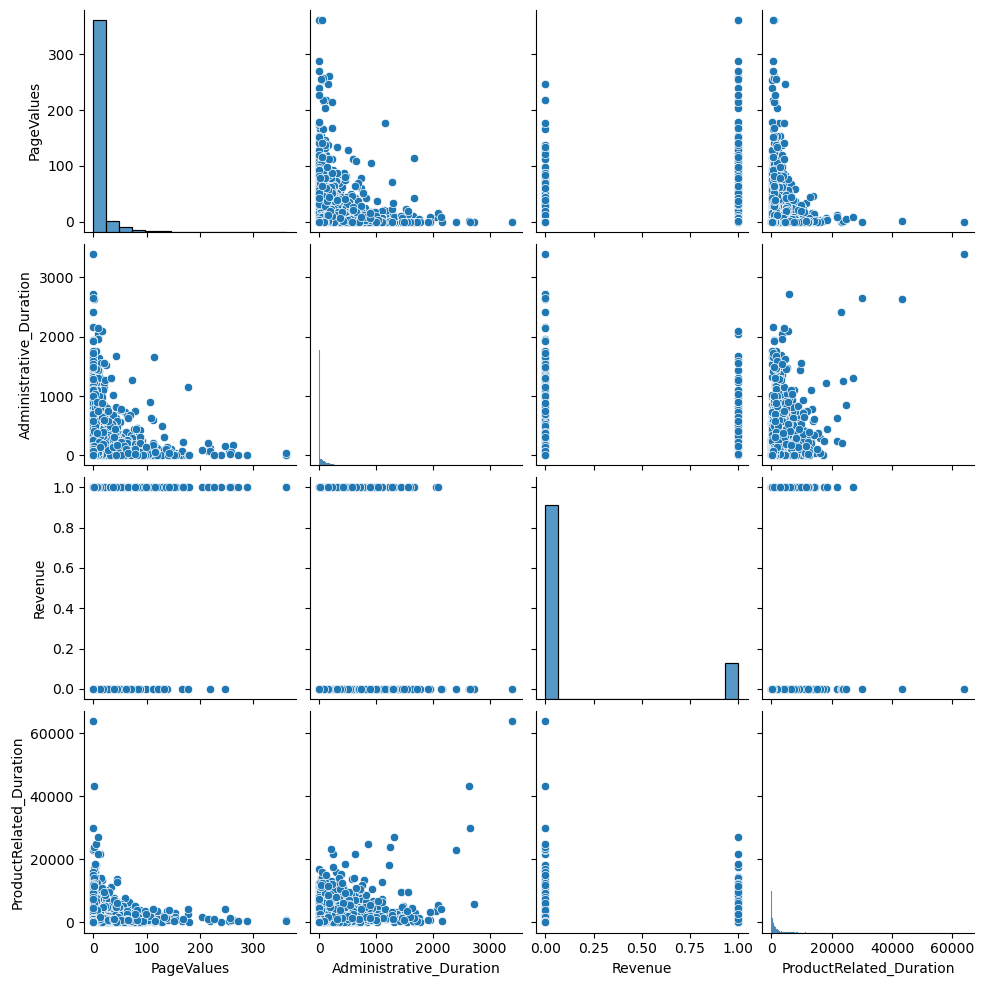

In [11]:
#figure size
plt.figure(figsize=(10, 7))

#plotting graphs
sns.pairplot(df_data[["PageValues", "Administrative_Duration", "Revenue", "ProductRelated_Duration"]])

<Figure size 1000x700 with 0 Axes>

<AxesSubplot: >

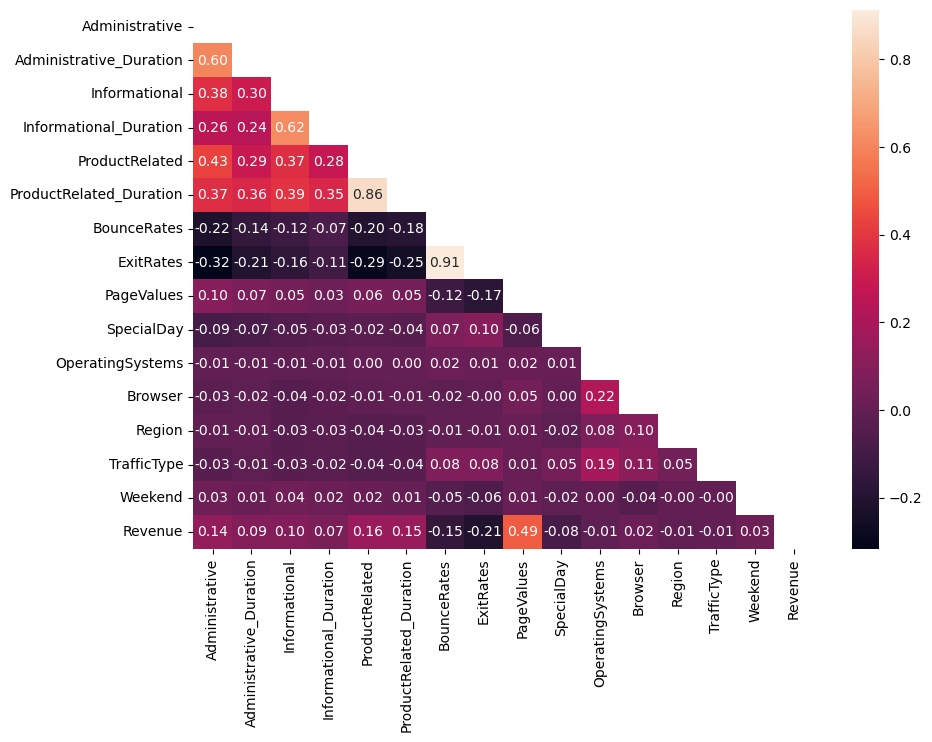

In [12]:
corr_df = df_data.corr()

plt.figure(figsize=(10, 7))

mask = np.triu(np.ones_like(corr_df))
sns.heatmap(corr_df, mask=mask, annot=True, fmt='.2f')

### 1.3 Automating EDA via sweetviz and Pandas Profiling

                                             |          | [  0%]   00:00 -> (? left)


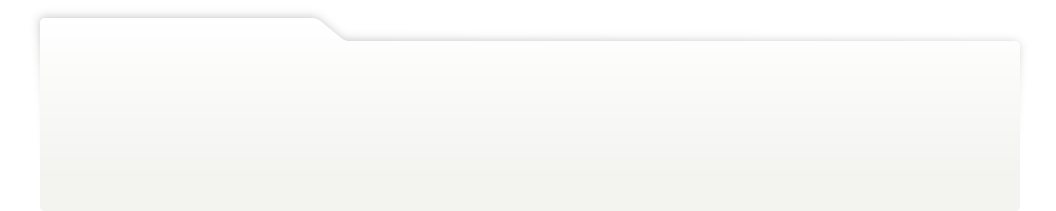
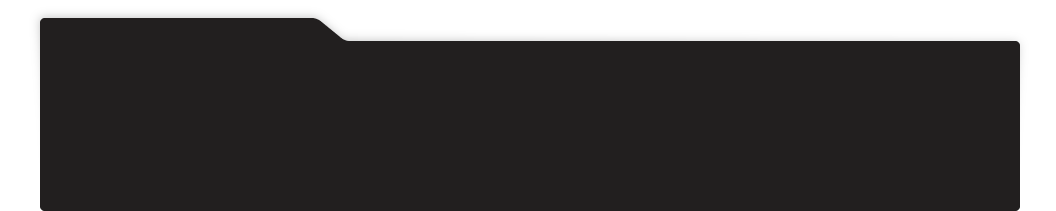
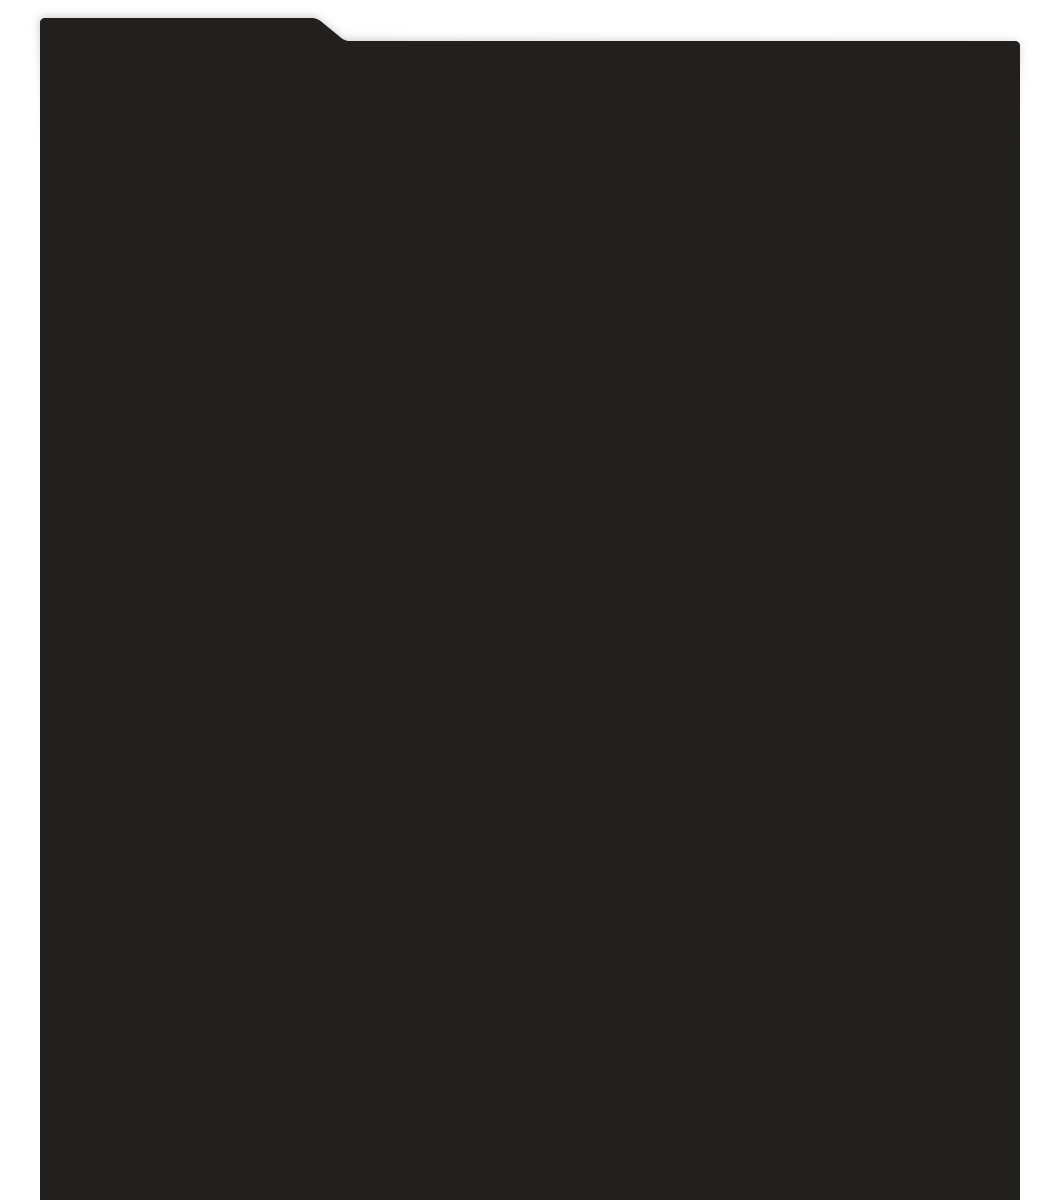
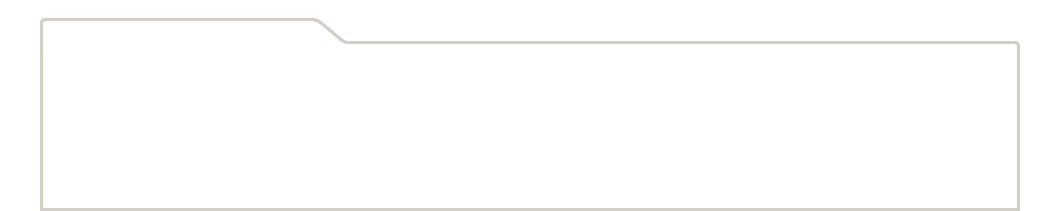
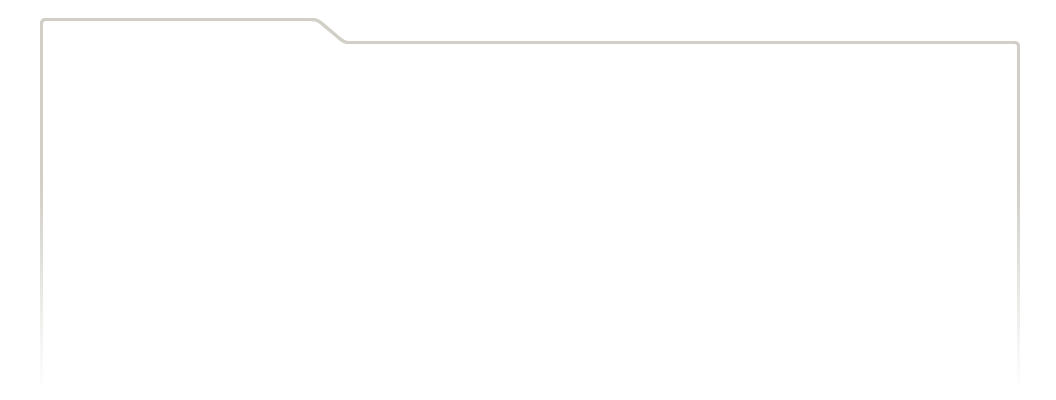
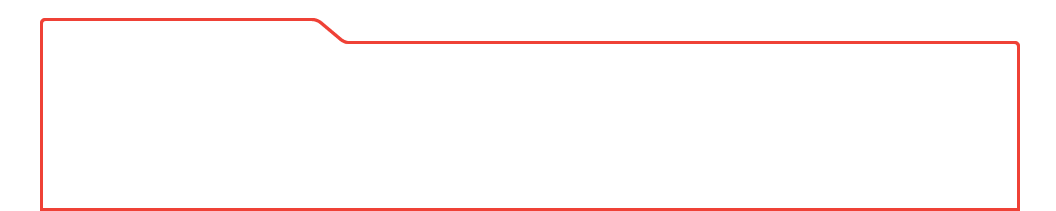
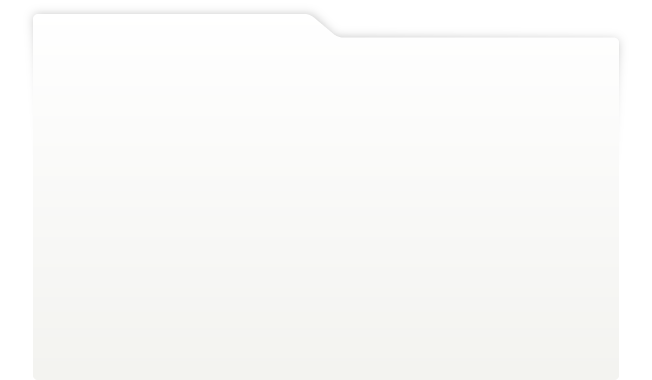
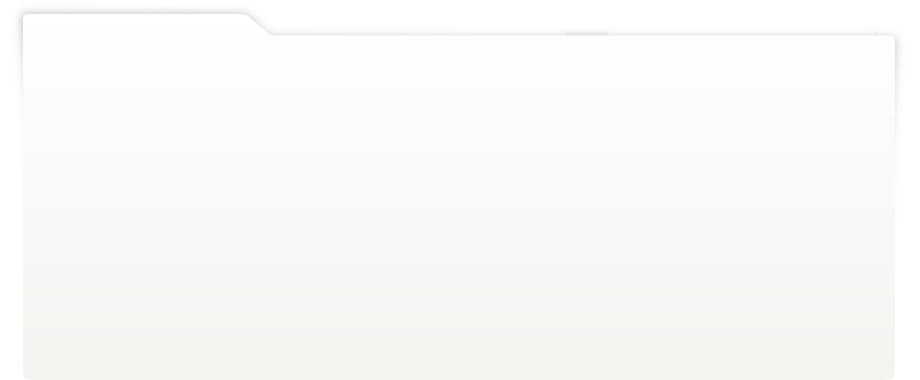
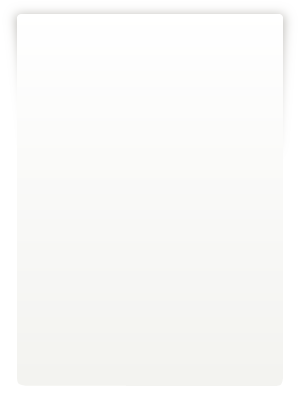
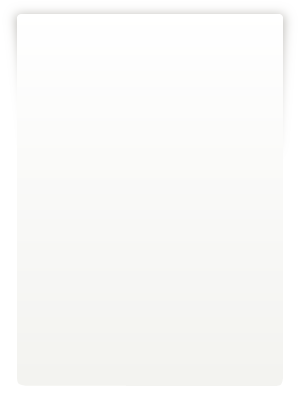
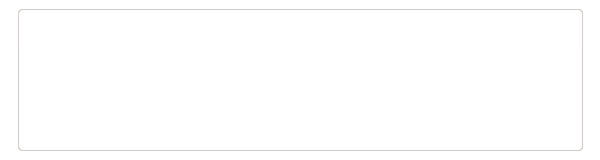
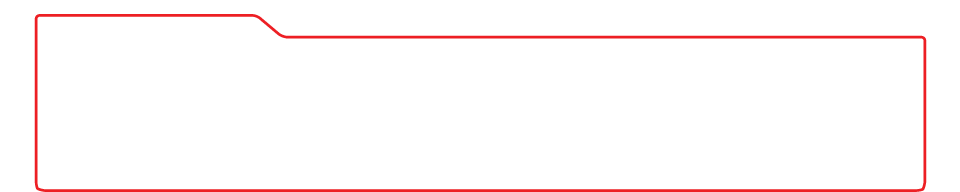
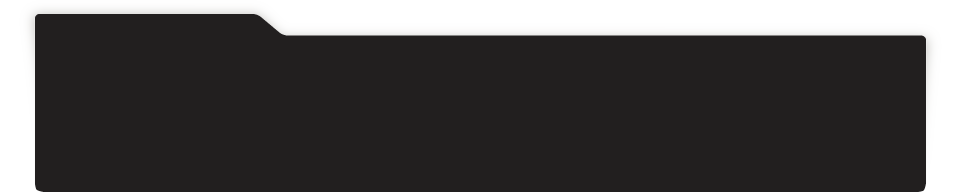
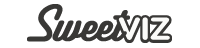
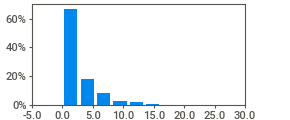
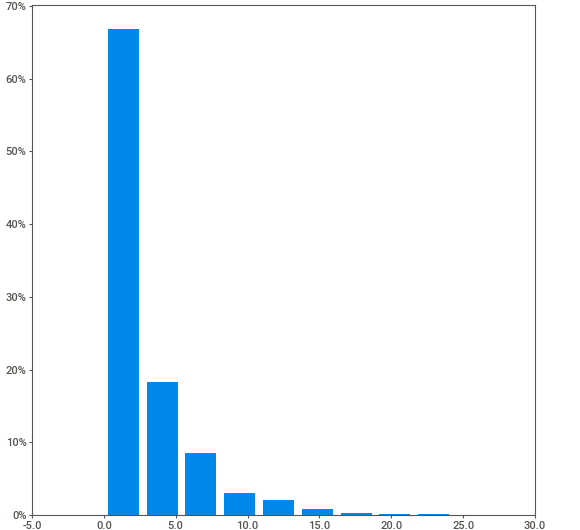
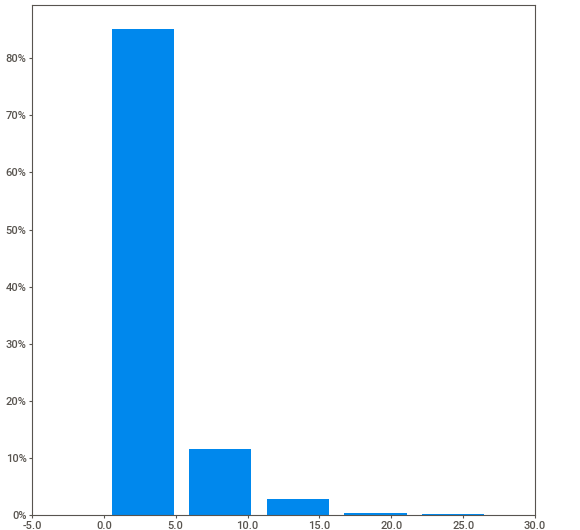
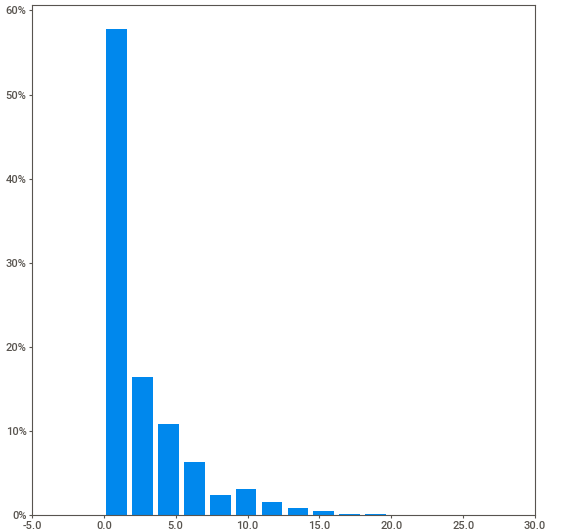
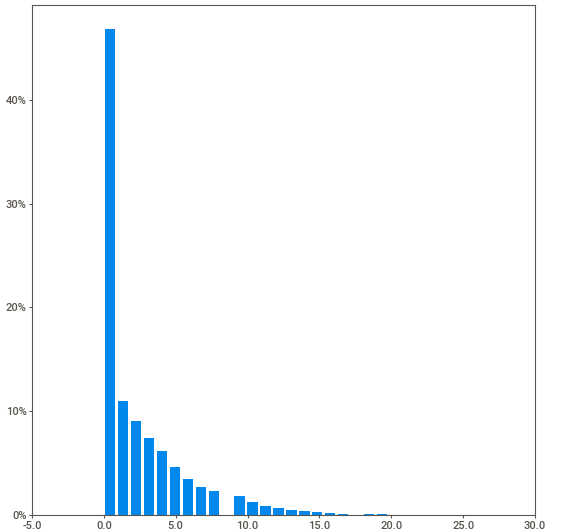
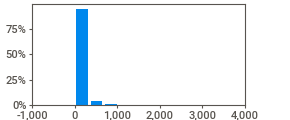
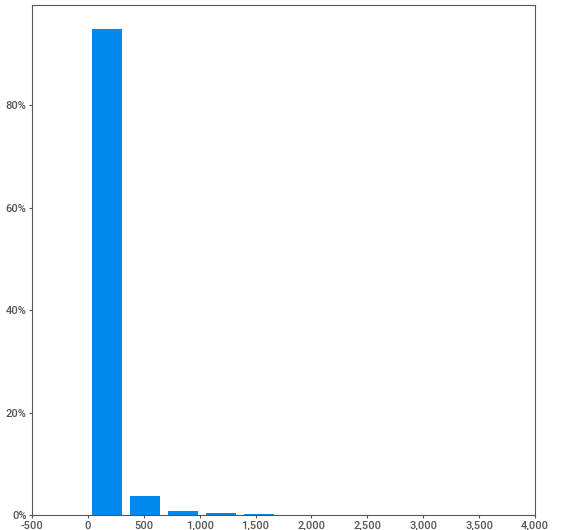
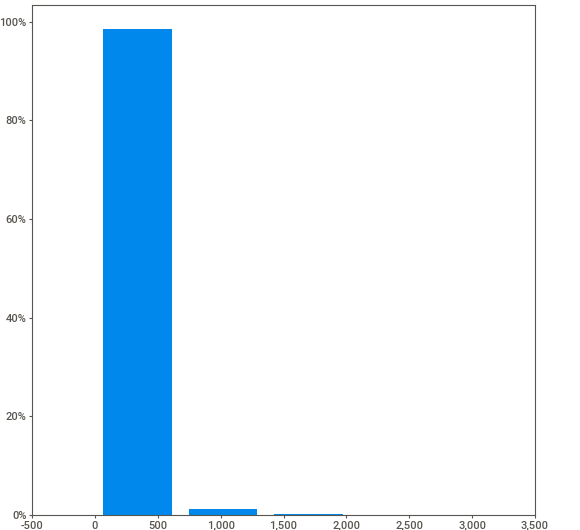
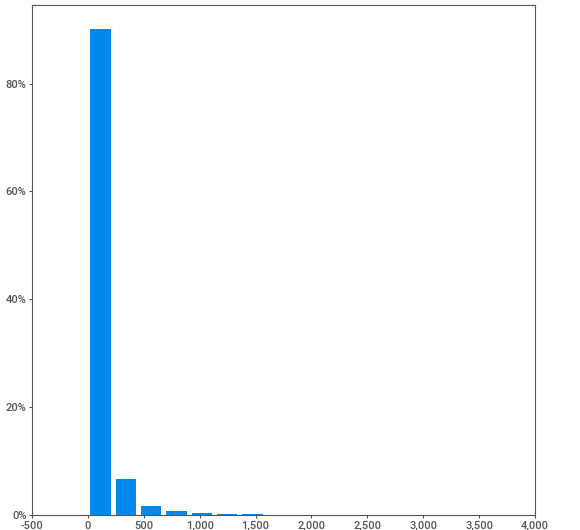
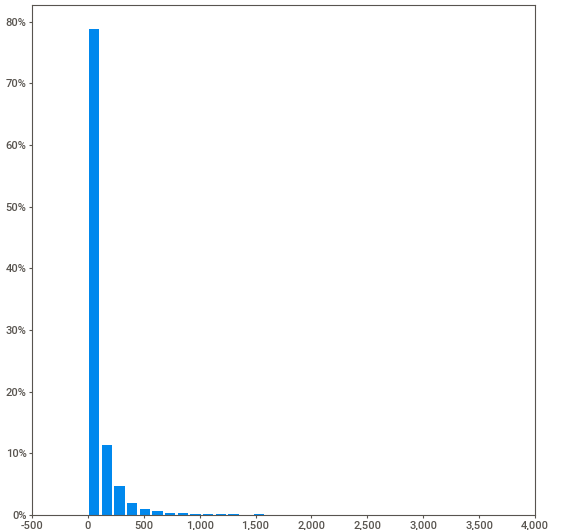
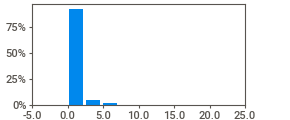
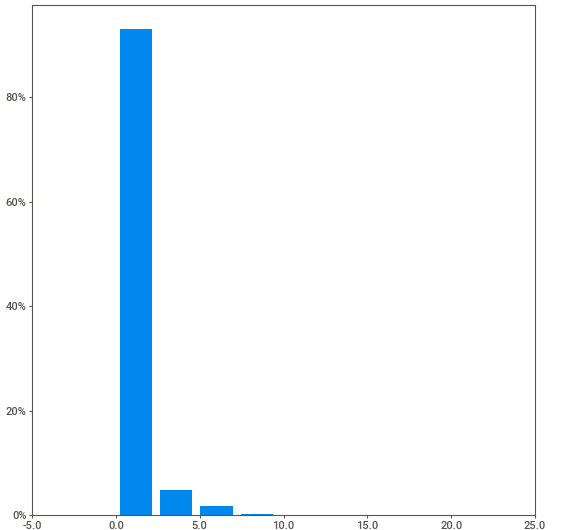
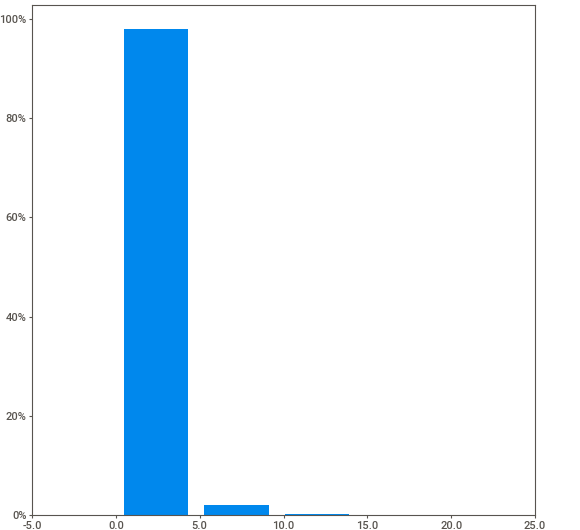
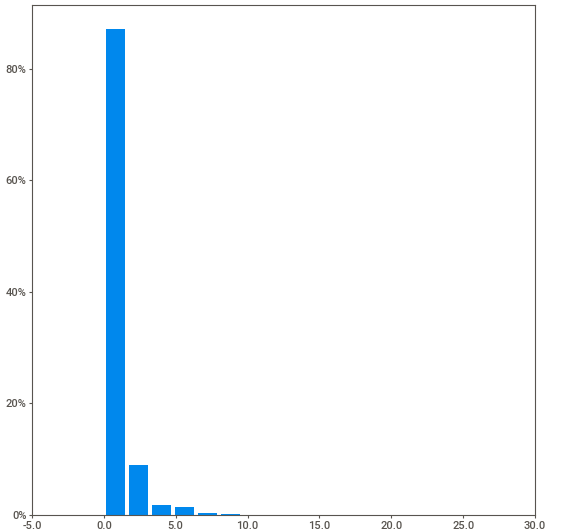
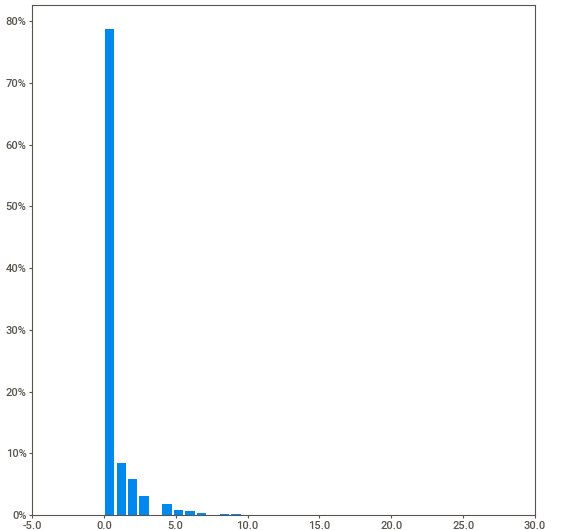
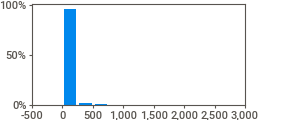
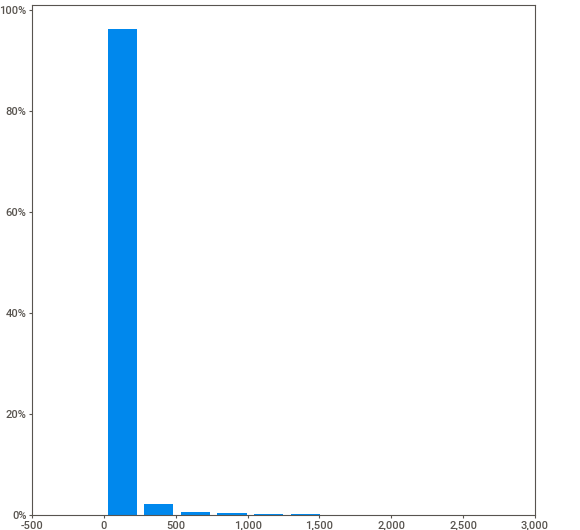
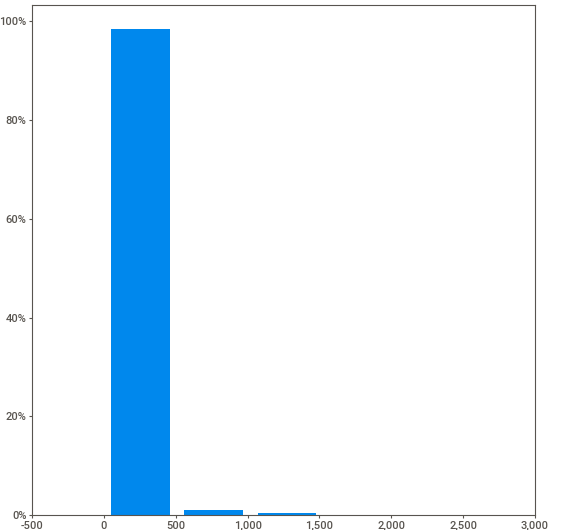
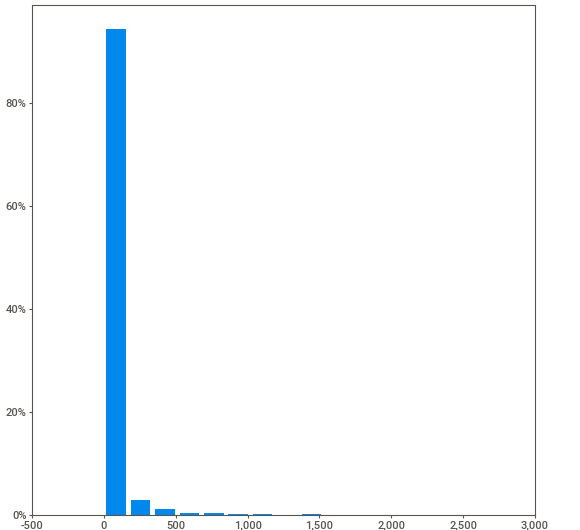
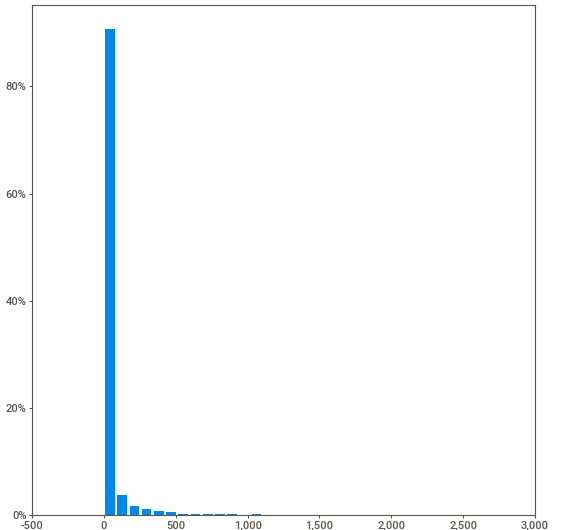
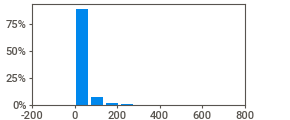
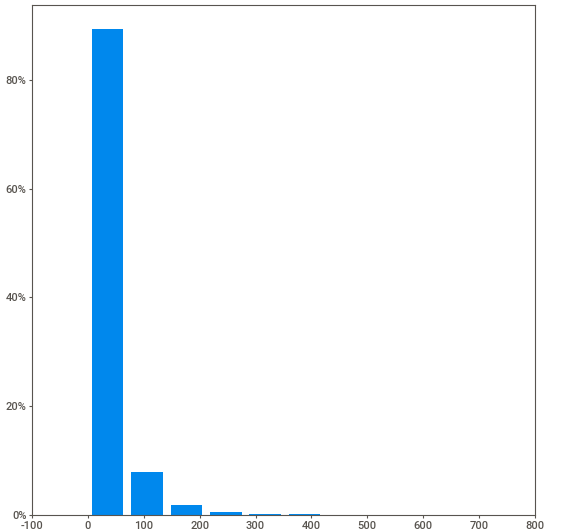
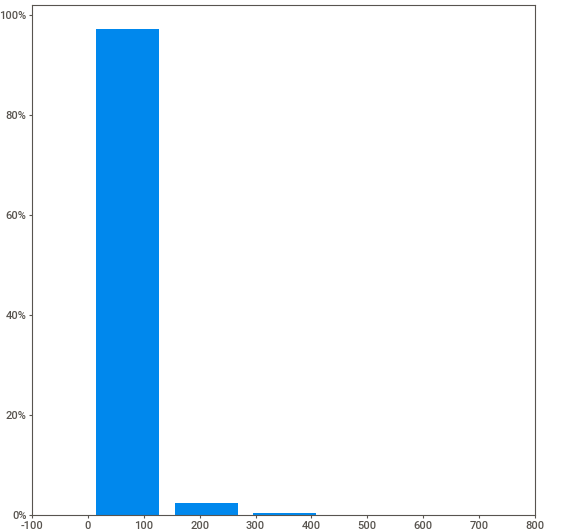
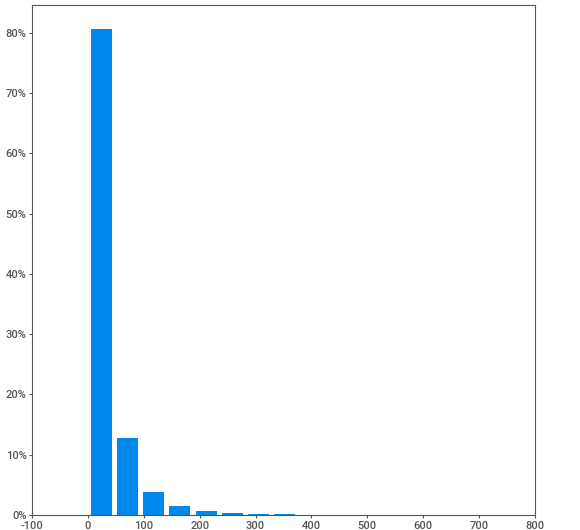
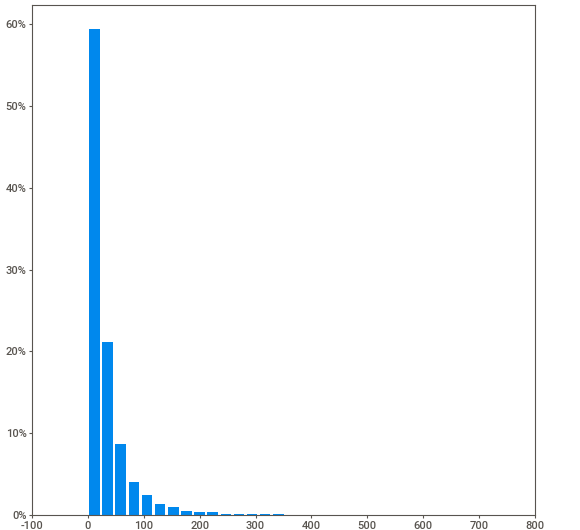
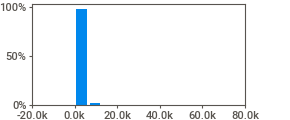
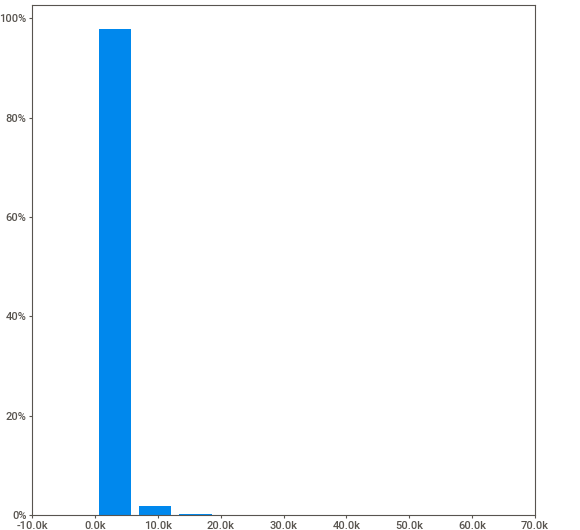
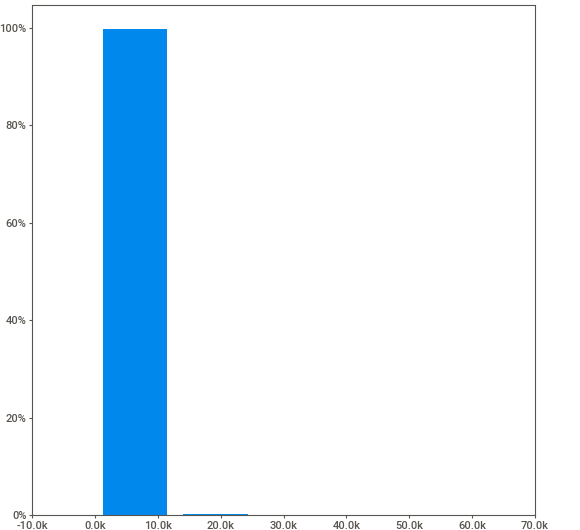
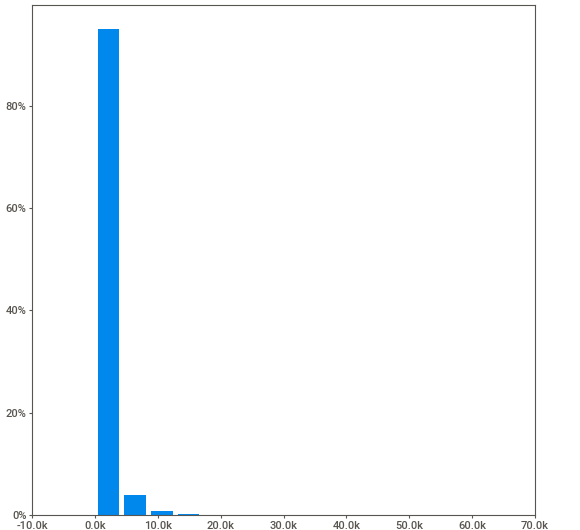
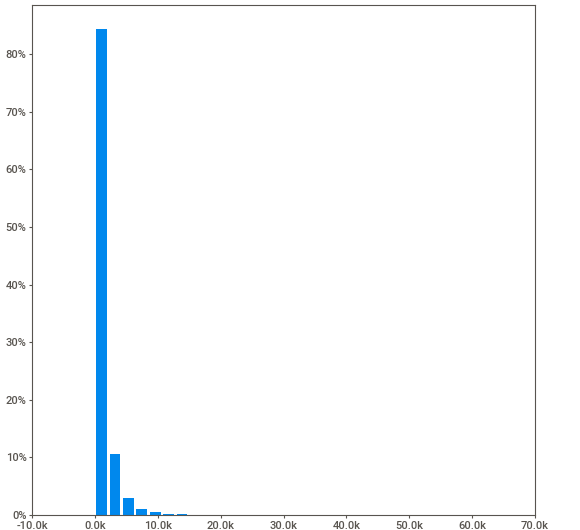
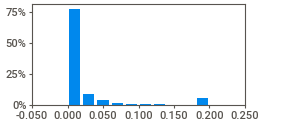
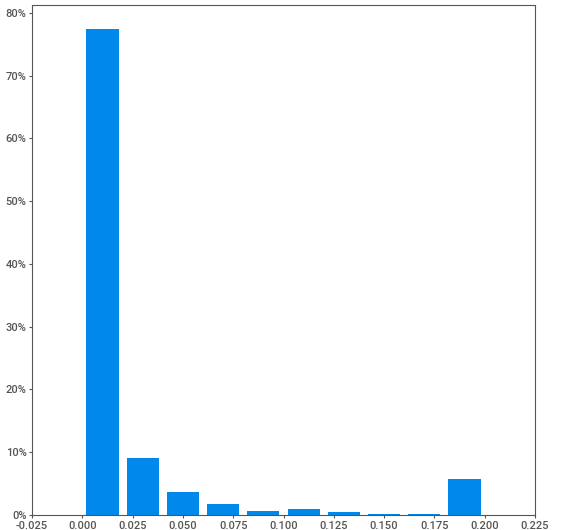
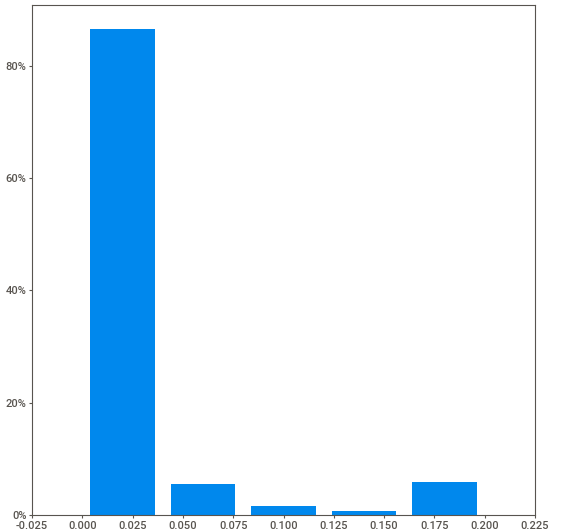
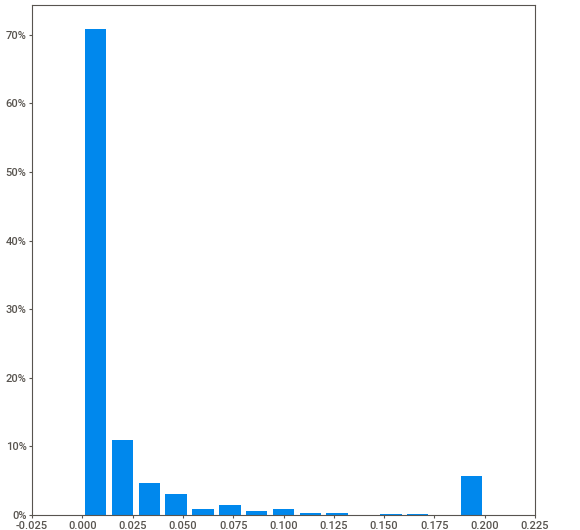
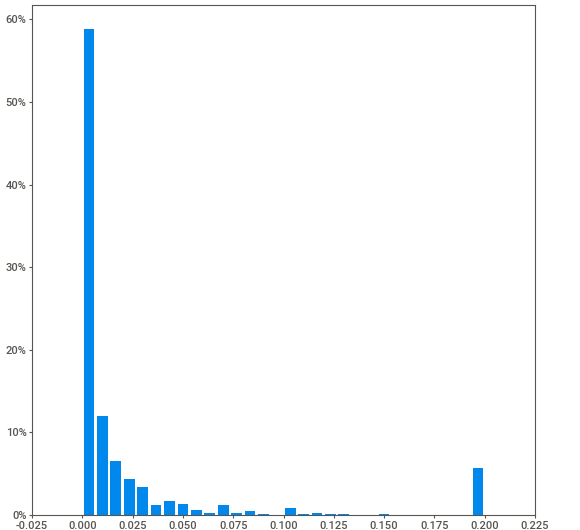
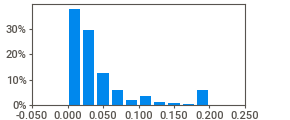
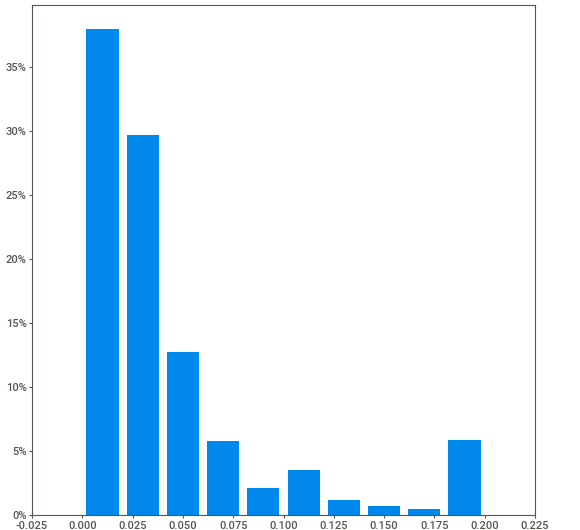
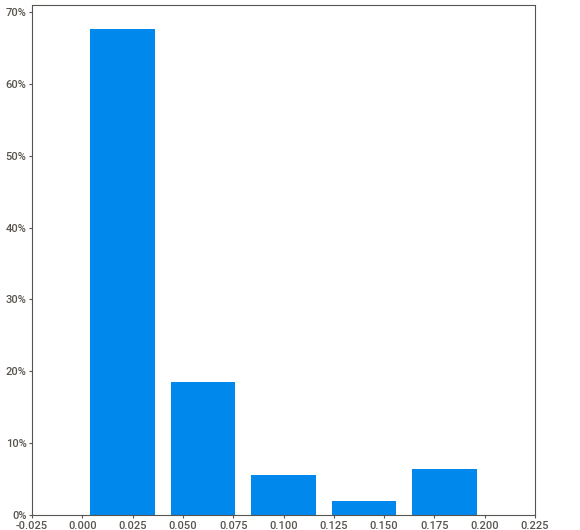
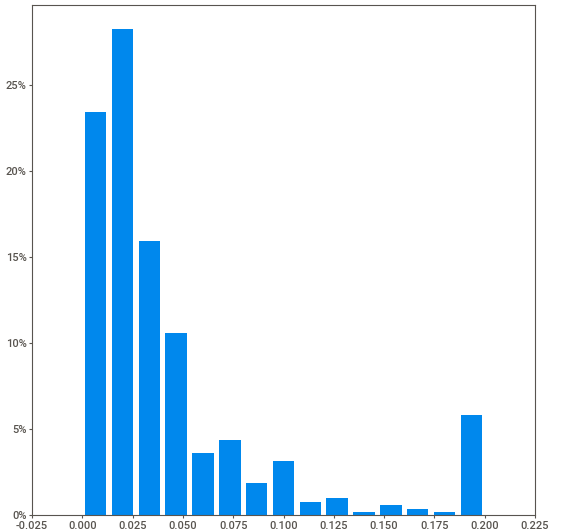
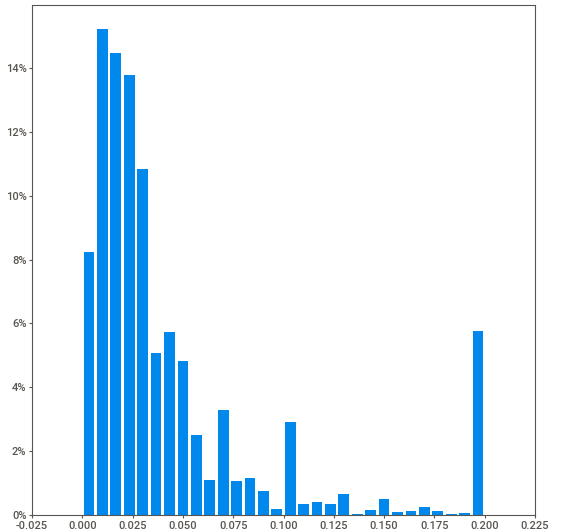
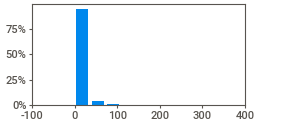
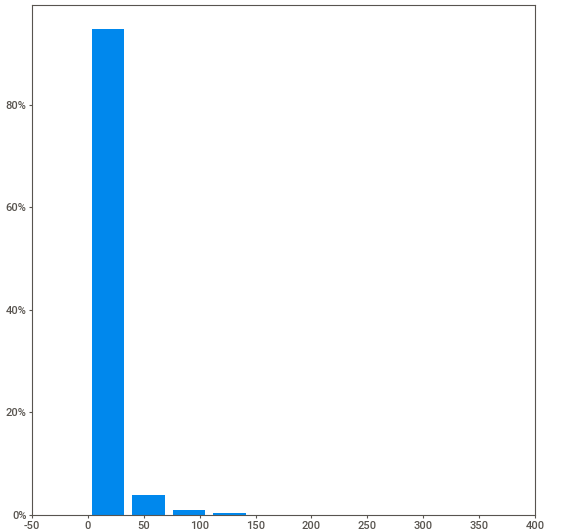
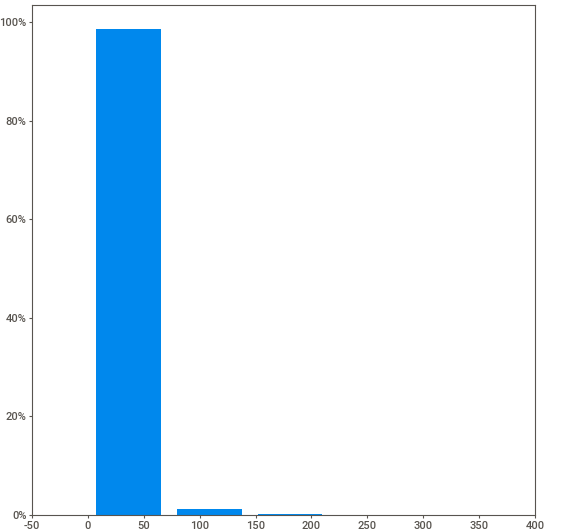
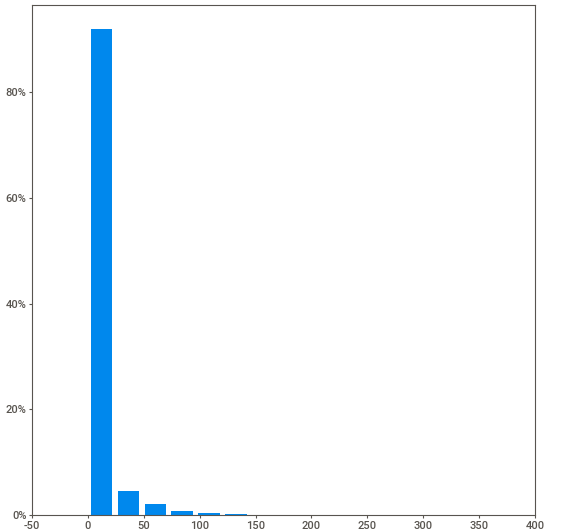
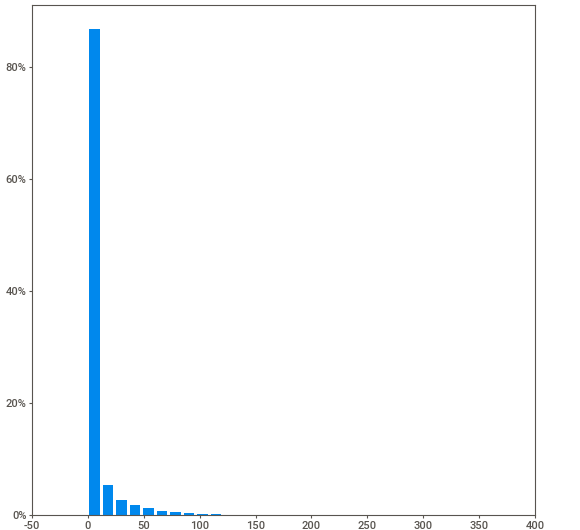
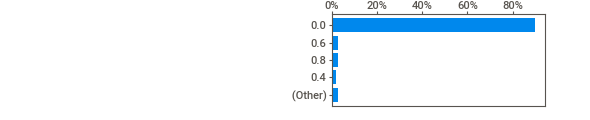
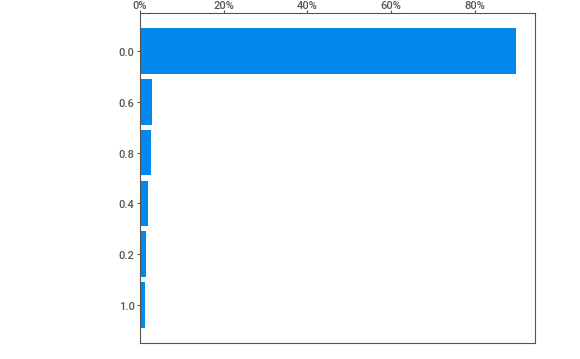
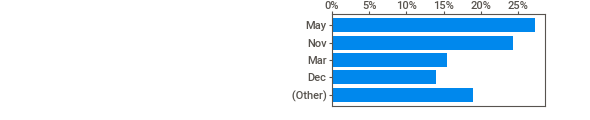
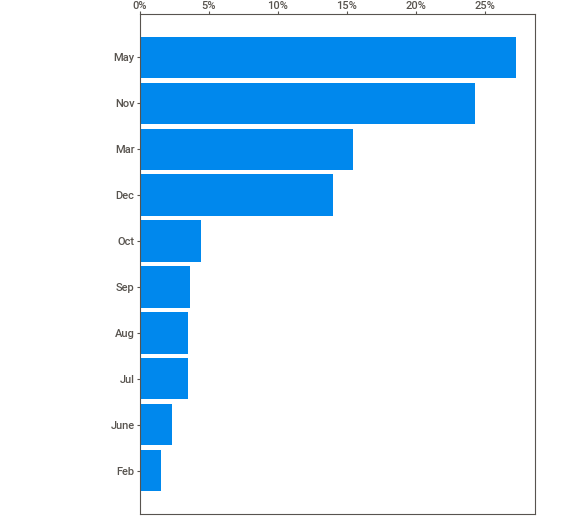
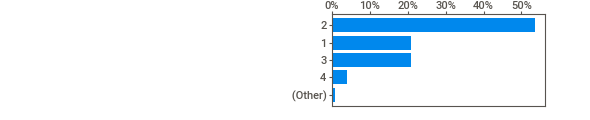
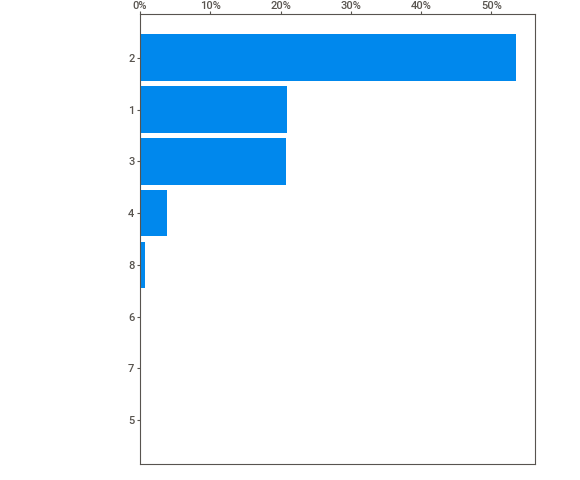
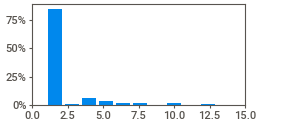
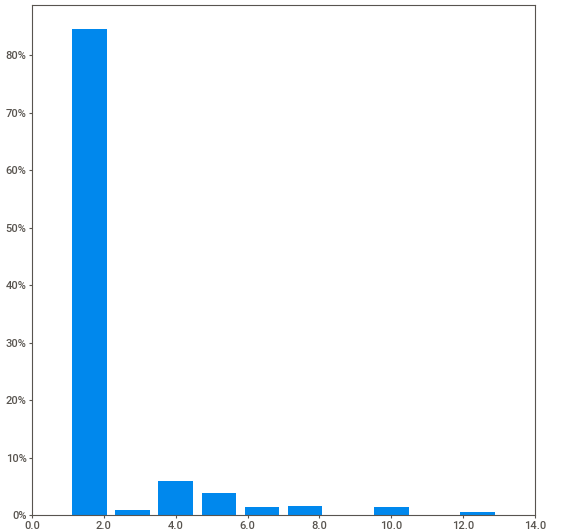
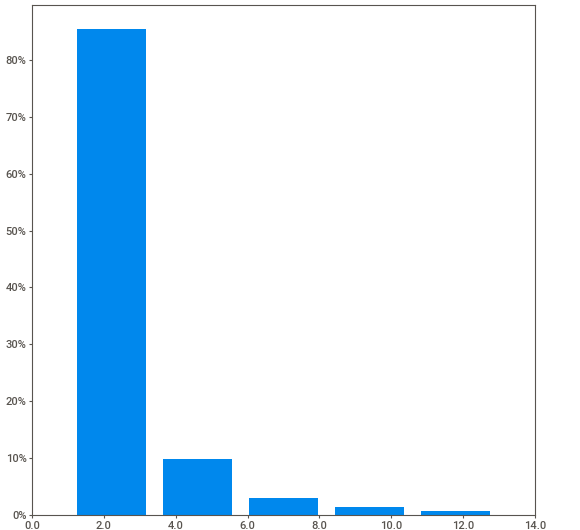
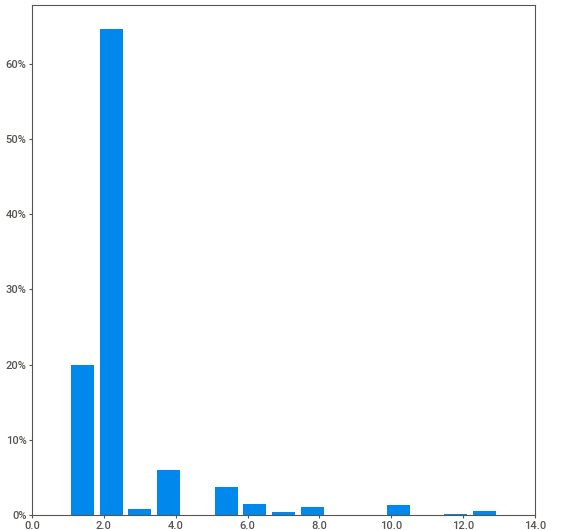
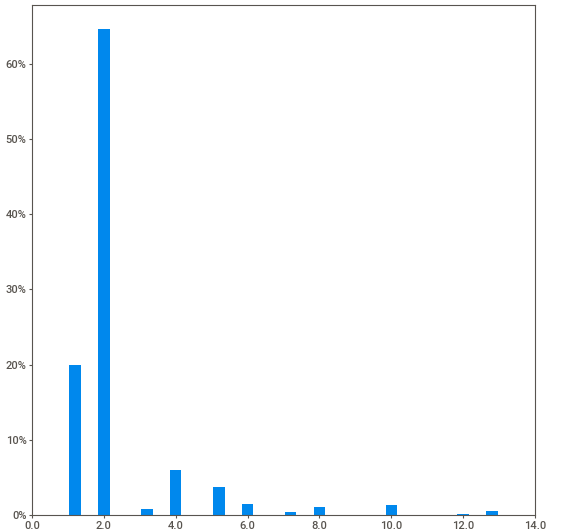
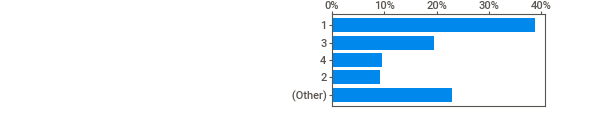
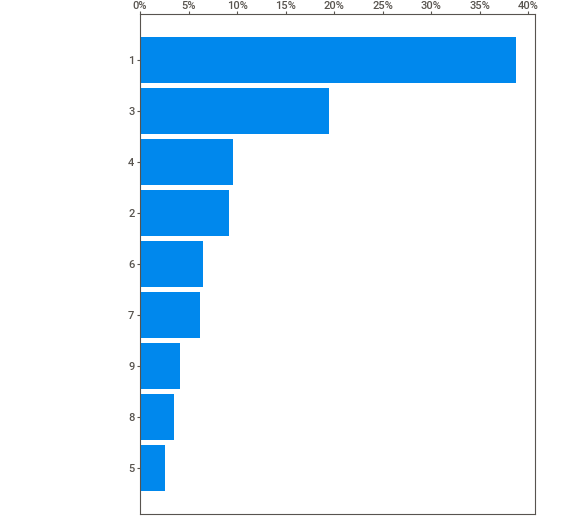
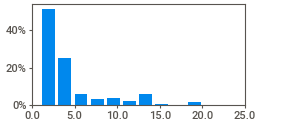
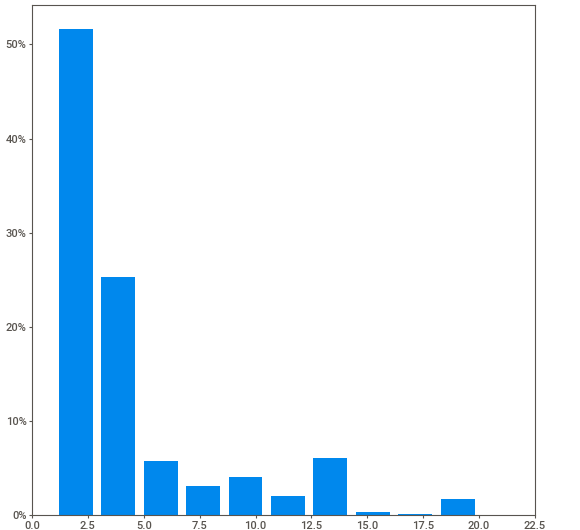
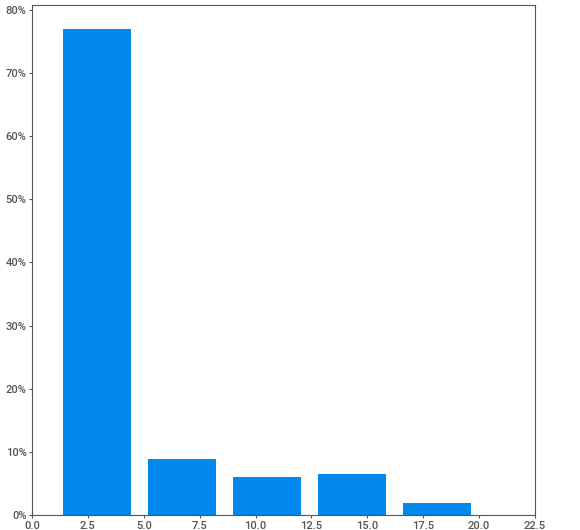
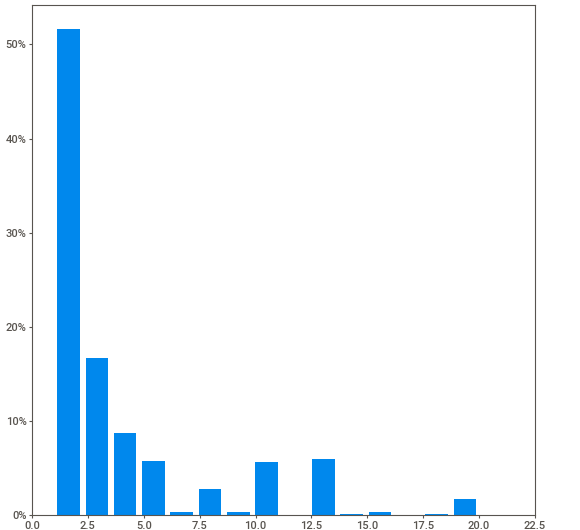
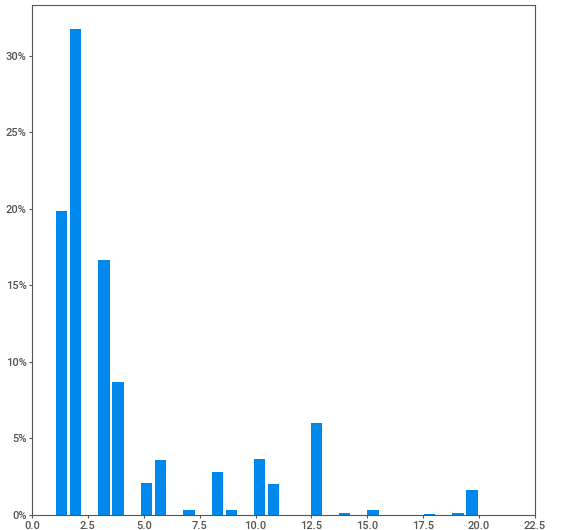
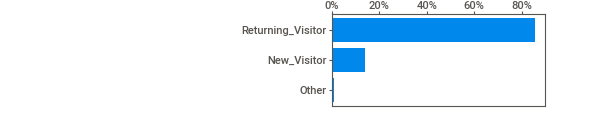
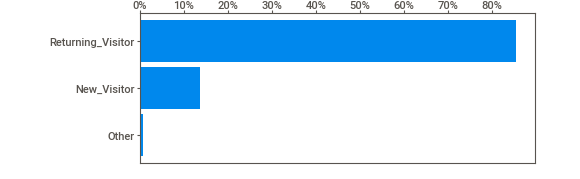
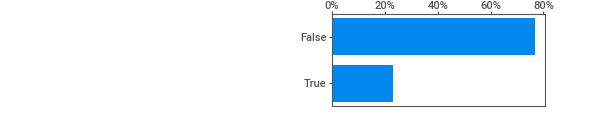
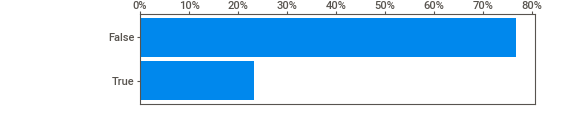
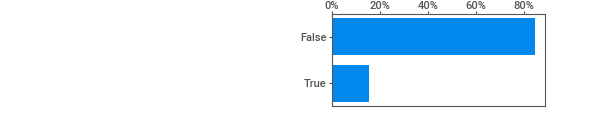
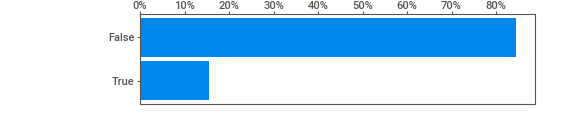
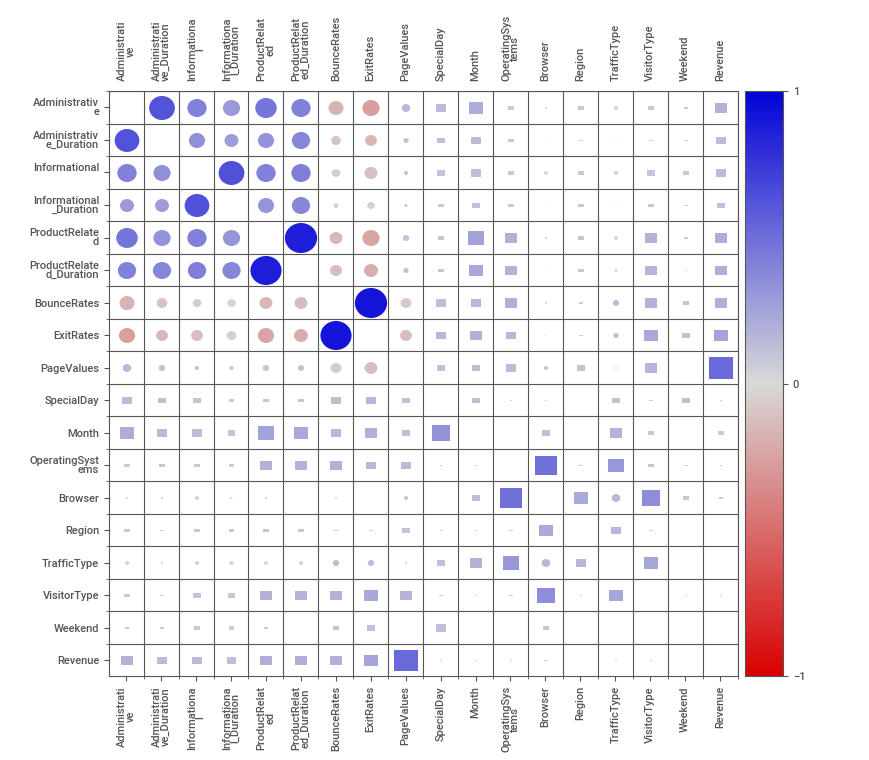
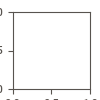

In [13]:
import sweetviz as sv
orig_data_report = sv.analyze(df_data)
orig_data_report.show_notebook()

In [14]:
# Pandas Profiling

In [32]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df_data)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### 1.4 split data to train and test
using data entries corresponding to the months of June—December as training set,
and those corresponding to February—March as test set.

#### 1.4.1 making sure all columns are numerical:

In [15]:
visitor_str2num = {
    s: i for i, s in enumerate(df_data['VisitorType'] .unique())
}
print(visitor_str2num)
df_data['VisitorType'] = df_data['VisitorType'].replace(visitor_str2num)

{'Returning_Visitor': 0, 'New_Visitor': 1, 'Other': 2}


In [16]:
df_data['Weekend']=df_data['Weekend'].replace({True:1, False:0})
df_data['Revenue']=df_data['Revenue'].replace({True:1, False:0})

In [17]:
df_data.Month.unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [18]:
dict_d = {'Jan':1, 'Feb': 2, 'Mar': 3, 'Apr':4, 'May': 5, 'June': 6, 'Jul': 7,
          'Aug': 8, 'Sep': 9,'Oct': 10,'Nov': 11, 'Dec': 12}
df_data.Month = df_data.Month.map(dict_d)
df_data.Month.unique()

array([ 2,  3,  5, 10,  6,  7,  8, 11,  9, 12])

In [19]:
# Note: mont of April not considered in training and test as requested.
# training set: data for months of June—December as 
df_train = df_data[df_data.Month >= 6 ]

# test set: data for months of Feb-March
df_test = df_data[df_data.Month <=3]
print('Original set  ---> ',df_data.shape,
      '\nTraining set  ---> ',df_train.shape,
      '\nTesting set   ---> ', df_test.shape)


df_train['Month'].min(), df_train['Month'].max() 
df_test['Month'].min(), df_test['Month'].max() 

Original set  --->  (12330, 18) 
Training set  --->  (6875, 18) 
Testing set   --->  (2091, 18)


(6, 12)

(2, 3)

### 1.5 Pre-processing and Feature Selection
we make use of a LinearSVC coupled with SelectFromModel to evaluate feature importances and select the most relevant features

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder 

In [21]:
df_train = df_train.drop(columns='Month')
df_test = df_test.drop(columns='Month')


X_train, y_train = df_train.drop(columns=target), df_train[target]
X_test, y_test = df_test.drop(columns=target), df_test[target]
# shape:
X_train.shape, y_train.shape
X_test.shape, y_test.shape

X_train.columns
X_train.head(3)

((6875, 16), (6875,))

((2091, 16), (2091,))

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend'],
      dtype='object')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
5455,0,0.0,0,0.0,1,207.570248,0.0,0.007937,0.000000,0.0,2,2,1,5,0,0
5456,3,40.2,0,0.0,11,201.133333,0.0,0.020000,0.000000,0.0,2,2,2,1,1,0
5457,1,63.4,0,0.0,3,120.400000,0.0,0.000000,42.293068,0.0,1,1,3,3,1,0


In [22]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

# Normalize X_train and X_test
scaler = MinMaxScaler()
scaler = scaler.fit(X_train)
# transform data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

X_train_scaled.shape, X_test_scaled.shape

((6875, 16), (2091, 16))

array([0.05821164, 0.05620626, 0.03213126, 0.03210753, 0.07996395,
       0.08078098, 0.06403029, 0.09243242, 0.29747068, 0.        ,
       0.03548771, 0.03599065, 0.0486457 , 0.0535813 , 0.01375456,
       0.01920509])

(6875, 5)

(2091, 5)

                         importance
feature                            
PageValues                    0.297
ExitRates                     0.092
ProductRelated_Duration       0.081
ProductRelated                0.080
BounceRates                   0.064
Administrative                0.058
Administrative_Duration       0.056
TrafficType                   0.054
Region                        0.049
Browser                       0.036
OperatingSystems              0.035
Informational                 0.032
Informational_Duration        0.032
Weekend                       0.019
VisitorType                   0.014
SpecialDay                    0.000


<AxesSubplot: xlabel='feature'>

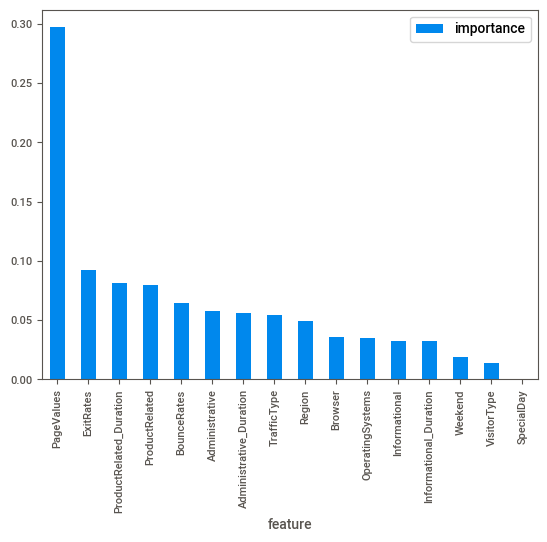

In [23]:
# feature selection
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X_train_scaled, y_train)
clf.feature_importances_ 
model_feat = SelectFromModel(clf, prefit=True)

X_train_new = model_feat.transform(X_train_scaled)
X_test_new = model_feat.transform(X_test_scaled)
X_train_new.shape  
X_test_new.shape


importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
print (importances)
importances.plot.bar()

### 1.6 Build a predictive classification model 

In [37]:


model_1 = Pipeline(
    steps=[
        #('scaler', MinMaxScaler()),
        #('preprocessor', preprocessor),
        #('feature_selection', SelectFromModel(LinearSVC(penalty="l1"))),
        ('classification', LinearRegression())
    ])

model_1.fit(X_train, np.asarray(y_train))
print("LinearRegression model score: %.3f" % model_1.score(X_test, y_test))

Pipeline(steps=[('classification', LinearRegression())])

LinearRegression model score: 0.312


In [36]:
model_2 = Pipeline([
        #('scaler', MinMaxScaler()),
        #('preprocessor', preprocessor),
        #('feature_selection', SelectFromModel(LinearSVC(penalty="l1"))),
        ('classification', RandomForestClassifier())
    ])

model_2.fit(X_train_new, y_train)
print("RandomForestClassifier model score: %.3f" % model_2.score(X_test_new, y_test))

Pipeline(steps=[('classification', RandomForestClassifier())])

RandomForestClassifier model score: 0.935


##  Task 2. Customer Segmentation (25 points)

Generate user-behavior clusters based on the purchasing behavior data for the complete dataset. 

1. How many clusters do you see? What are the significant differences between the various clusters in terms of the size of the clusters and purchase ratio. Perform as detailed analysis of the clusters as you can.
2. Return plots and cluster images generated for the data.
3. Perform a detailed analysis for each cluster corresponding to the variations in features and identify some behaviors corresponding to each particular cluster (e.g., which cluster represent new shoppers vs. brand conscious shoppers etc.).

Point breakdown:

- (15 points) Clustering code
- (10 points) Clustering analysis




### 2.1 Apply PCA and visualize

In [49]:
X = np.concatenate([X_train_scaled, X_test_scaled])
y = np.concatenate([y_train, y_test])
X.shape, y.shape

((8966, 16), (8966,))

In [66]:
from sklearn import decomposition
import plotly.express as px

np.random.seed(5)
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X_pca = pca.fit_transform(X)


PCA(n_components=3)

In [67]:
# display functions
def visualize_2pcs(pcs, y):
    fig, ax = plt.subplots()
    plot = plt.scatter(pcs[:,0], pcs[:,1], c=y) 
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])
    
def visualize_3pcs(pcs, y):
    fig, ax = plt.subplots()
    ax = fig.add_subplot(projection='3d')
    plot = ax.scatter(pcs[:,0], pcs[:,1], pcs[:,2], c=y)
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

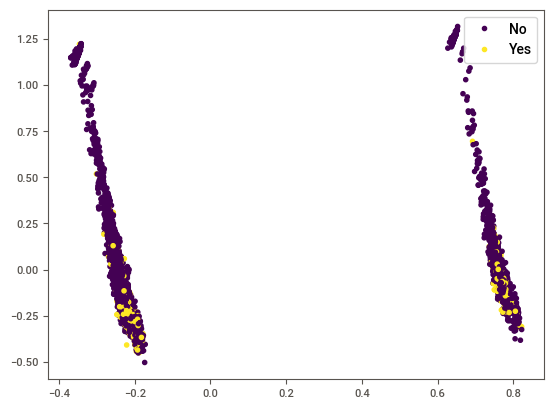

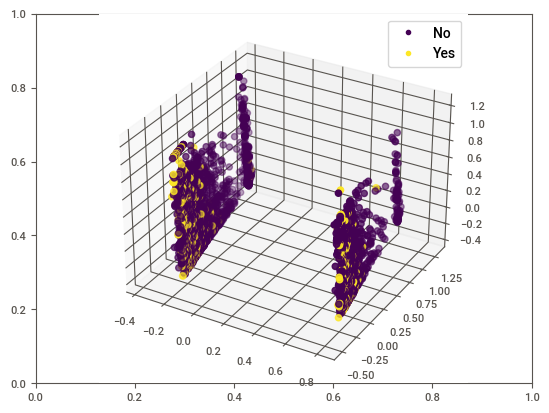

In [70]:
visualize_2pcs(X_pca,y)
visualize_3pcs(X_pca,y)

### 2.2 Apply DBSCAN and visualize

In [41]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics

db = DBSCAN(eps=0.3, min_samples=10).fit(df_data)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 1
Estimated number of noise points: 12315


Text(0.5, 1.0, 'Estimated number of clusters: 1')

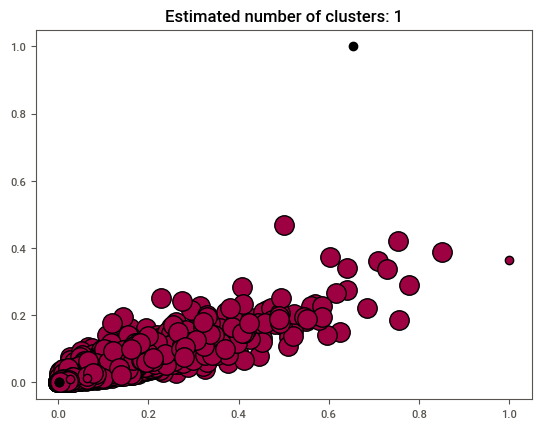

In [40]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X_train_new[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X_train_new[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

## Task 3. Semi-Supervised Learning (15 points)
Consider you have training data with the `Revenue` attribute for records from June—September only. For all records from October—December, however, `Revenue` attribute is missing. Build a semi-supervised self-labeling model to estimate `Revenue` for the missing records in October—December and then fit your classifier. Report classification performance on February—March data set with and without the self-labeled data.

1. If you do not consider the records from October—December, generate the classification performance on test data
2. After using the self-labeled data and training data together, does the classification performance on test data improve? Discuss which metrics are most important for your conclusion.

Point breakdown:

- ( 2 points) Correctly splits the data by month into labeled, unlabeled, and test 
- (8 points) Generate labels for unlabeled samples with a self labeling technique
- (5 points) Compare and contrast performance difference on test dataset between labels only and labels & self-labels

## Style and clarity (10 points). 
Write clear, readable, well-commented code following [PEP8](https://peps.python.org/pep-0008/); also include explanations in markdown cells, where appropriate. 





# Deliverables:
- Code in a single .ipynb notebook.
- Comments where appropriate.
- Figures, graphs, and tables where appropriate.
- Text explanations (in markdown cells) of what is being done and why.

